In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import holoviews as hv

In [143]:
# Получение данных
df = pd.read_csv("/Users/ivanbersenev/Documents/code/python/VKDATAML/ikit.csv")

In [152]:
df.to_excel("output.xlsx")

In [3]:
# Данные
df

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id
0,0,Alexandra Matuzko,NaN,Krasnoyarsk,NaN,1,2,14,0.002801,0.000302,0.248135,8.878481e-03,0.000208,196398
1,1,Anna Gosteva,13.10,Krasnoyarsk,NaN,1,2,28,0.005601,0.000388,0.282400,2.776468e-02,0.000357,761344
2,2,Alexandra Dvorinovich,28.1,Krasnoyarsk,NaN,1,2,53,0.010602,0.002881,0.293149,3.502240e-02,0.000689,1319095
3,3,Ksenia Shatrova,6.1,Krasnoyarsk,NaN,1,2,61,0.012202,0.002191,0.284383,2.733603e-02,0.000879,2579587
4,4,Denis Kustov,NaN,Krasnoyarsk,NaN,2,2,73,0.014603,0.002155,0.300108,5.617826e-02,0.000883,4829157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Valery Vorovenko,1.4.1979,Krasnoyarsk,NaN,2,2,1,0.000200,0.000000,0.199639,2.782068e-04,0.000052,740973496
4996,4996,Sergey Vestfal,NaN,NaN,NaN,2,1112,0,0.000000,0.000000,0.000000,4.942268e-27,0.000037,741504346
4997,4997,Nurtilek Toktosunov,23.11.2005,NaN,NaN,2,1113,0,0.000000,0.000000,0.000000,4.942268e-27,0.000037,742330115
4998,4998,Alexander Bazhenov,27.5.1952,NaN,NaN,2,1114,0,0.000000,0.000000,0.000000,4.942268e-27,0.000037,743696229


In [4]:
# Трехмерное графовое отображение набора данных прикрепил отдельно png файлом

<Axes: xlabel='eigenvector_centrality', ylabel='degree'>

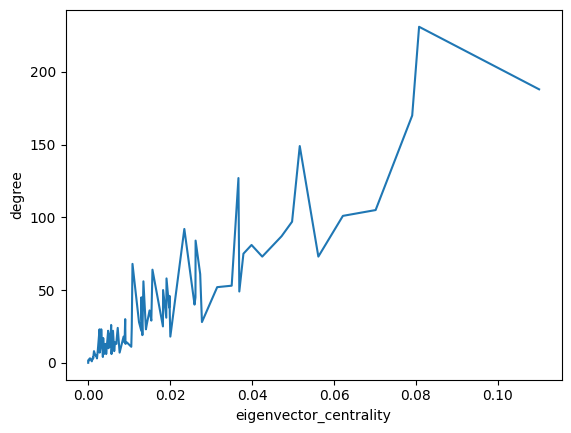

In [5]:
# Графики, аналогичные tableau
#Линейная диаграмма зависимости eigenvector_centrality от degree
sns.lineplot(df.head(100), x = "eigenvector_centrality", y = "degree")

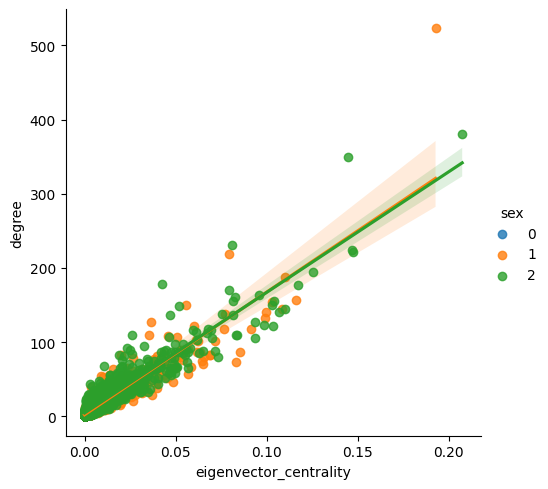

In [6]:
# зависимость eigenvector_centrality от degree. Точечная диаграмма
sns.lmplot(
    data=df, x="eigenvector_centrality", y="degree" , hue = "sex"
)

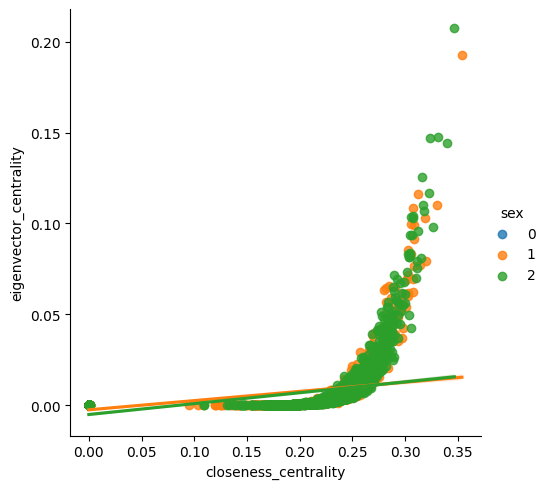

In [7]:
# зависимость closeness_centrality от eigenvector_centrality. Точечная диаграмма
sns.lmplot(
    data=df, x="closeness_centrality", y="eigenvector_centrality", hue = "sex"
)

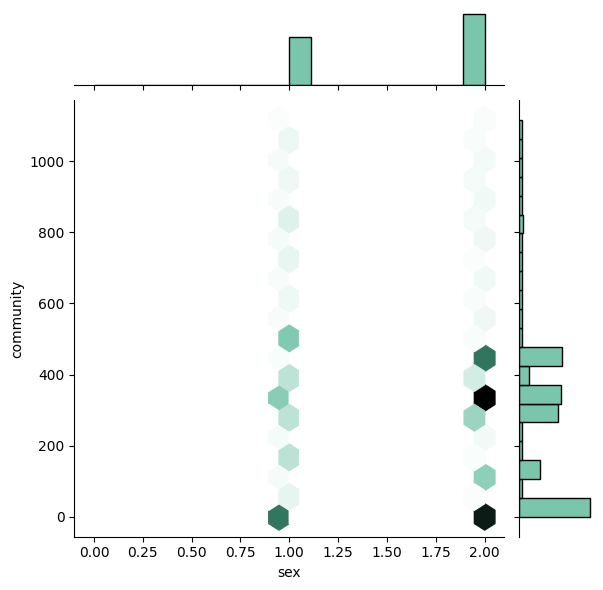

In [8]:
sns.jointplot(x=df.sex, y=df.community, kind="hex", color="#4CB391")

In [81]:
df_sex_community = df[df.sex != 0].sort_values(by = "community")

In [122]:
dff = df_sex_community[['community', 'sex','name']].groupby(['community','sex']).count().sort_values(by="name", ascending = False).head(30).reset_index()

Text(0.5, 0, 'номер сообщества')

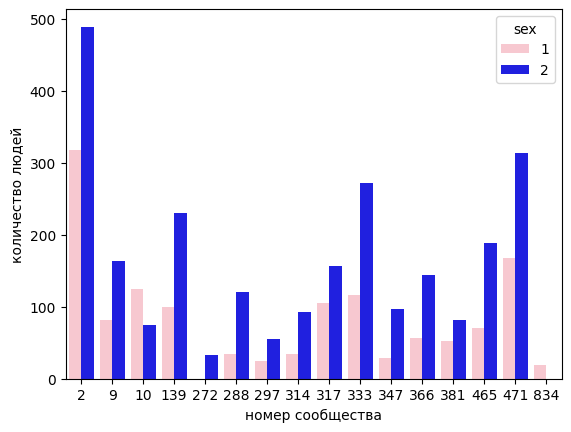

In [126]:
sns.barplot(data=dff, x="community", y="name", hue="sex", palette=['pink', 'blue'])
plt.ylabel('количество людей') 
plt.xlabel('номер сообщества') 


In [10]:
nz_migration = pd.read_csv("/Users/ivanbersenev/Downloads/migration_nz.csv")
nz_migration

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
...,...,...,...,...,...
86521,Net,Not stated,Australian Citizen,2016,80.0
86522,Net,Not stated,Total All Citizenships,2016,3177.0
86523,Net,All countries,New Zealand Citizen,2016,-1818.0
86524,Net,All countries,Australian Citizen,2016,3487.0


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
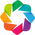

:Sankey   [Measure,Country]   (Value)

In [11]:
nz_migration = nz_migration[nz_migration["Measure"]!="Net"] 
nz_migration = nz_migration[~nz_migration["Country"].isin(["Not stated", "All countries"])] 
nz_migration_grouped = nz_migration.groupby(by=["Measure","Country"]).sum()[["Value"]]
nz_migration_grouped = nz_migration_grouped.reset_index()

hv.extension('bokeh')
nz_migration_grouped.head(10) 

continents = ["Asia", "Australia","Africa and the Middle East","Europe", "Americas", "Oceania"]
continent_wise_migration = nz_migration_grouped[nz_migration_grouped.Country.isin(continents)]
continent_wise_migration
hv.Sankey(continent_wise_migration)

In [12]:
european_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'Finland', 'France',
                      'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland',
                      'Romania', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine']

european_countries_migration = nz_migration_grouped[nz_migration_grouped["Country"].isin(european_countries)]

european_countries_migration.head()


hv.Sankey(european_countries_migration, kdims=["Measure", "Country"], vdims=["Value"])

:Sankey   [Measure,Country]   (Value)

In [13]:
top_cities = list(df.groupby("city").agg({"id": "count"}).sort_values(by = "id", ascending = False).head(5).index)
top_cities
ddf = df[df.city.isin(top_cities)]
ddf = ddf.groupby(['city', 'sex']).count().reset_index()
ddf['pol'] = ddf.sex.apply(lambda x: "м" if x == 2 else "ж")
ddf
hv.Sankey(ddf, kdims=["city", "pol"], vdims=["name"])

:Sankey   [city,pol]   (name)

In [14]:
df['birthday'] = pd.to_datetime(df.bdate, errors="coerce")
df['birthday_month'] = df.birthday.dt.month
df['birthday_year'] = df.birthday.dt.year

/var/folders/mq/6jjr20h17tdb5hd1gx2p2hcm0000gn/T/ipykernel_6856/1929936898.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['birthday'] = pd.to_datetime(df.bdate, errors="coerce")


<Axes: xlabel='birthday_month', ylabel='birthday_year'>

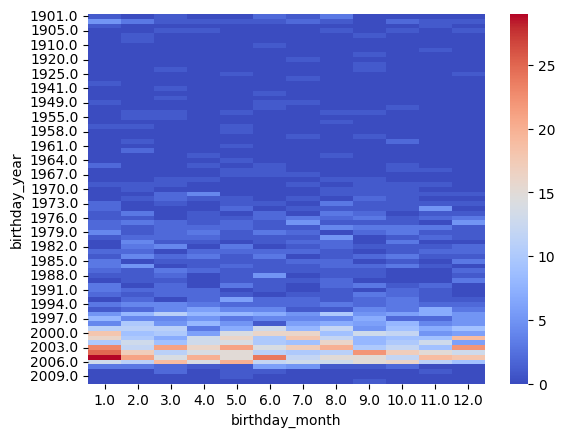

In [15]:
heatmap_data = df.groupby(['birthday_year', 'birthday_month']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm')

<Axes: xlabel='birthday_month', ylabel='birthday_year'>

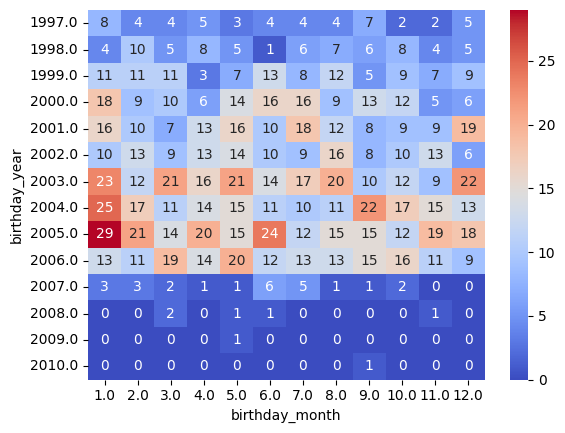

In [16]:
heatmap_data = df[df.birthday_year > 1996].groupby(['birthday_year', 'birthday_month']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)

<Axes: xlabel='birthday_month', ylabel='birthday_year'>

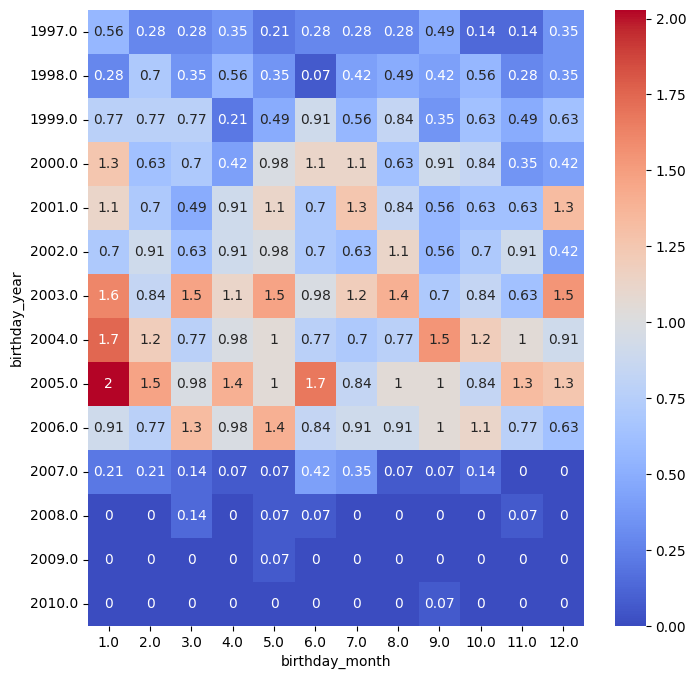

In [17]:
heatmap_data = df[df.birthday_year > 1996].groupby(['birthday_year', 'birthday_month']).size().unstack(fill_value=0)
total_sum = heatmap_data.sum().sum()
heatmap_data = heatmap_data / total_sum * 100
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)

<Axes: xlabel='sex', ylabel='birthday_year'>

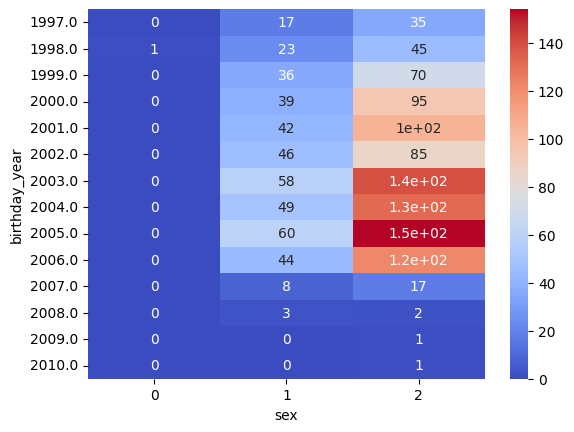

In [18]:
heatmap_data = df[df.birthday_year > 1996].groupby(['birthday_year', 'sex']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)

In [19]:
# самые активные community
active = df.groupby(['community']).agg({"name":"count"}).sort_values(by="name", ascending = False).name[:18].index
# active_cities = df.groupby(['community']).agg(['count']).sort_values(by="name", ascending = False).city[:30].index
# active_cities

<Axes: xlabel='city', ylabel='community'>

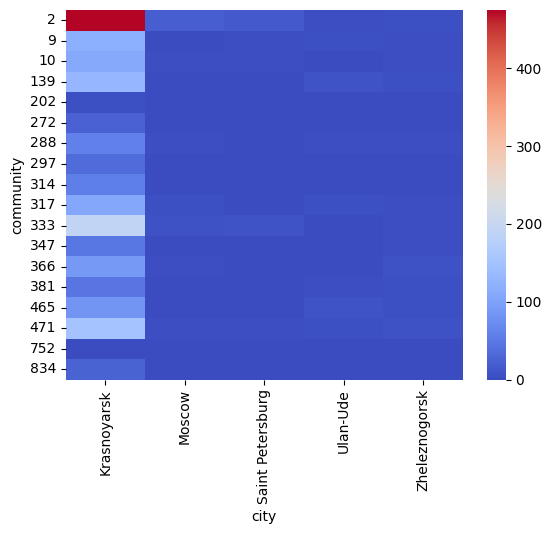

In [20]:
top_cities = list(df.groupby("city").agg({"id": "count"}).sort_values(by = "id", ascending = False).head(5).index)
heatmap_data = df[(df.community.isin(active)) & (df.city.isin(top_cities))].groupby(['community', 'city']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='coolwarm')

In [134]:
df

,Unnamed: 0,name,bdate,city,home_town,sex,community,degree,centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality,pagerank,id,birthday,birthday_month,birthday_year
0,0,Alexandra Matuzko,NaN,Krasnoyarsk,NaN,1,2,14,0.002801,3.015052e-04,0.248135,0.008878,0.000208,196398,NaT,NaN,NaN
1,1,Anna Gosteva,13.10,Krasnoyarsk,NaN,1,2,28,0.005601,3.880424e-04,0.282400,0.027765,0.000357,761344,NaT,NaN,NaN
2,2,Alexandra Dvorinovich,28.1,Krasnoyarsk,NaN,1,2,53,0.010602,2.881175e-03,0.293149,0.035022,0.000689,1319095,NaT,NaN,NaN
3,3,Ksenia Shatrova,6.1,Krasnoyarsk,NaN,1,2,61,0.012202,2.190731e-03,0.284383,0.027336,0.000879,2579587,NaT,NaN,NaN
4,4,Denis Kustov,NaN,Krasnoyarsk,NaN,2,2,73,0.014603,2.155138e-03,0.300108,0.056178,0.000883,4829157,NaT,NaN,NaN
5,5,Ruslan Brezhnev,NaN,Krasnoyarsk,NaN,2,2,231,0.046209,1.752988e-02,0.315366,0.080767,0.002888,7382377,NaT,NaN,NaN
6,6,Anastasia Tamarovskaya,NaN,Krasnoyarsk,NaN,1,2,45,0.009002,1.223378e-03,0.277920,0.026180,0.000572,12978275,NaT,NaN,NaN
7,7,Sofya Ilina,NaN,NaN,NaN,1,2,2,0.000400,3.919634e-07,0.188747,0.000164,0.000072,29836588,NaT,NaN,NaN
8,8,Anna Pyataeva,19.11.1979,Krasnoyarsk,NaN,1,2,101,0.020204,5.803334e-03,0.307690,0.062167,0.001235,64813933,1979-11-19,11.0,1979.0
9,9,Andrey Kushnarenko,28.7.1978,Krasnoyarsk,NaN,2,2,170,0.034007,1.158525e-02,0.311012,0.079085,0.001970,90694585,1978-07-28,7.0,1978.0
